In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/CS640/Project_Dataset")


Mounted at /content/gdrive


In [2]:
data = pd.read_csv("./scores.csv")

def subtract_from_100(x):
    return 100 - x

reverse_data = data.applymap(subtract_from_100)

In [3]:
features = data.iloc[:, :-1]
scores = data.iloc[:, -1]

reverse_features = reverse_data.iloc[:, :-1]
reverse_scores = reverse_data.iloc[:, -1]

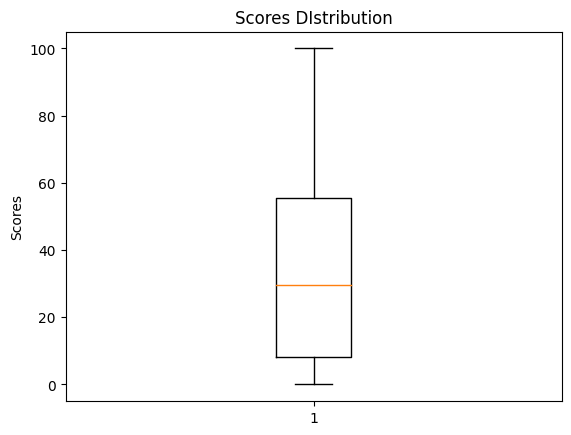

In [4]:
plt.boxplot(list(scores))
plt.title('Scores DIstribution')
plt.ylabel('Scores')
plt.show()

In [5]:
features = np.array(features)
scores = np.array(scores)

reverse_features = np.array(reverse_features)
reverse_scores = np.array(reverse_scores)

In [6]:
my_list = list(range(0,150))
random.shuffle(my_list)
divided_list = [my_list[i:i+25] for i in range(0, len(my_list), 25)]
print(divided_list)

[[21, 25, 3, 79, 10, 57, 41, 49, 130, 96, 106, 114, 86, 115, 98, 8, 81, 138, 69, 27, 74, 35, 20, 28, 22], [0, 113, 148, 44, 91, 149, 30, 24, 58, 42, 75, 9, 34, 128, 17, 120, 95, 109, 6, 93, 83, 104, 145, 125, 105], [48, 53, 4, 135, 13, 126, 85, 76, 119, 140, 77, 134, 51, 50, 1, 40, 70, 129, 97, 111, 62, 139, 63, 122, 124], [90, 116, 78, 38, 147, 5, 31, 36, 146, 64, 43, 132, 23, 102, 71, 121, 131, 118, 123, 54, 67, 136, 88, 66, 29], [33, 46, 32, 142, 52, 14, 60, 37, 16, 61, 108, 47, 65, 59, 94, 89, 112, 107, 82, 84, 55, 127, 143, 101, 12], [68, 26, 11, 144, 15, 87, 7, 80, 100, 92, 45, 19, 110, 141, 73, 72, 56, 133, 39, 18, 117, 103, 99, 2, 137]]


In [7]:
def bar_plot_comparison(predicted, actual): # predicted_1 and predicted_1 and actual are three list of scores to compare
  
  x = list(range(0, len(actual)))

  barWidth = 0.3

  r1 = range(len(x))
  r2 = [x + barWidth for x in r1]
  # r3 = [x + barWidth for x in r2]
  # r4 = [x + barWidth for x in r3]

  plt.figure(figsize=(14, 7))

  plt.bar(r1, predicted, color='blue', width=barWidth, edgecolor='black', label='Predicted')
  # plt.bar(r2, predicted_2, color='orange', width=barWidth, edgecolor='black', label='Predicted (reverse)')
  # plt.bar(r3, predicted_3, color='red', width=barWidth, edgecolor='black', label='Predicted (average)')
  plt.bar(r2, actual, color='green', width=barWidth, edgecolor='black', label='Actual')

  plt.xlabel('X-axis')
  plt.ylabel('Scores')
  plt.xticks([r + barWidth for r in range(len(x))], x)

  plt.legend()
  plt.show()

In [8]:
def result2list(result):
  flatten = []
  for item in result:
    flatten.extend(item)
  return flatten

In [9]:
class PrintLog(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 15 == 0:
            print("Epoch {} - loss: {:.4f}".format(epoch, logs['loss']))

print_callback = PrintLog()

In [22]:
i = 0
list_result = []
# list_reverse_result = []
list_groundtruth = []
for sel in divided_list:
  i += 1
  print("Round " + str(i))
  train_features = features[list(set(range(features.shape[0])) - set(sel))]
  train_scores = scores[list(set(range(features.shape[0])) - set(sel))]  
  test_features = features[sel]
  test_scores = scores[sel]

  reverse_train_features = reverse_features[list(set(range(reverse_features.shape[0])) - set(sel))]
  reverse_train_scores = reverse_scores[list(set(range(reverse_features.shape[0])) - set(sel))]  
  reverse_test_features = reverse_features[sel]

  list_groundtruth.append(test_scores)
  
  model = Sequential()
  model.add(Dense(16, input_dim = 3, activation = 'relu'))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(1, activation = 'linear'))
  model.compile(loss='mean_squared_error', optimizer='adam')


  model.fit(reverse_train_features, reverse_train_scores, epochs = 100, batch_size = 25, callbacks = [print_callback], verbose = 0)
  result = model.predict(reverse_test_features)
  result = result2list(result)
  result = [100 - i for i in result]
  list_result.append(result)

# i = 0
# for sel in divided_list:
#   i += 1
#   print("Round " + str(i))
#   reverse_train_features = reverse_features[list(set(range(reverse_features.shape[0])) - set(sel))]
#   reverse_train_scores = reverse_scores[list(set(range(reverse_features.shape[0])) - set(sel))]  
#   reverse_test_features = reverse_features[sel]
#   reverse_test_scores = reverse_scores[sel]
  
#   model = Sequential()
#   model.add(Dense(16, input_dim = 3, activation = 'relu'))
#   model.add(Dense(4, activation = 'relu'))
#   model.add(Dense(1, activation = 'linear'))
#   model.compile(loss='mean_squared_error', optimizer='adam')


#   model.fit(reverse_train_features, reverse_train_scores, epochs = 80, batch_size = 32, callbacks=[print_callback], verbose=0)
#   result = model.predict(reverse_test_features)
#   result = result2list(result)
#   reverse_result = [100 - i for i in result]
#   list_reverse_result.append(reverse_result)

  

Round 1
Epoch 0 - loss: 1849.0536
Epoch 15 - loss: 840.2385
Epoch 30 - loss: 706.2294
Epoch 45 - loss: 610.8427
Epoch 60 - loss: 559.3232
Epoch 75 - loss: 540.0676
Epoch 90 - loss: 532.9126
1/1 [==============================] - 0s 60ms/step
Round 2
Epoch 0 - loss: 5097.9692
Epoch 15 - loss: 3053.8713
Epoch 30 - loss: 1506.1305
Epoch 45 - loss: 758.5490
Epoch 60 - loss: 633.1965
Epoch 75 - loss: 587.6865
Epoch 90 - loss: 552.2584
1/1 [==============================] - 0s 92ms/step
Round 3
Epoch 0 - loss: 3290.3289
Epoch 15 - loss: 1288.8735
Epoch 30 - loss: 637.8957
Epoch 45 - loss: 581.1525
Epoch 60 - loss: 557.5804
Epoch 75 - loss: 545.9111
Epoch 90 - loss: 540.5368
1/1 [==============================] - 0s 62ms/step
Round 4
Epoch 0 - loss: 4621.5469
Epoch 15 - loss: 2193.2273
Epoch 30 - loss: 851.4339
Epoch 45 - loss: 688.2286
Epoch 60 - loss: 587.3489
Epoch 75 - loss: 550.4305
Epoch 90 - loss: 535.3489
1/1 [==============================] - 0s 57ms/step
Round 5
Epoch 0 - loss: 6780

Round 1


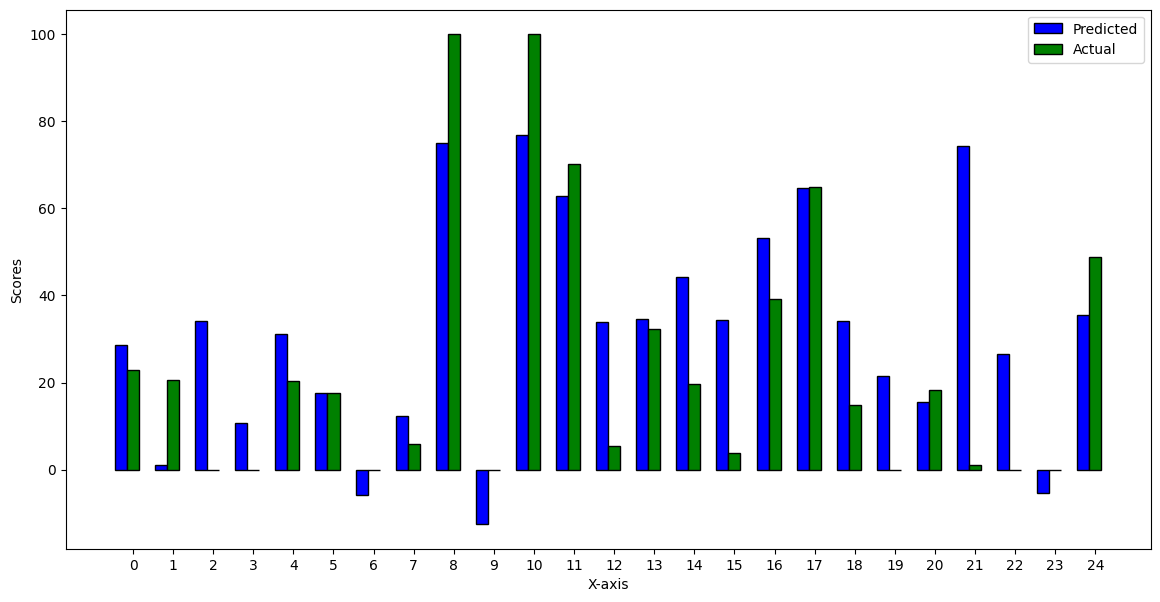

MSE is:  516.7471856009599
Round 2


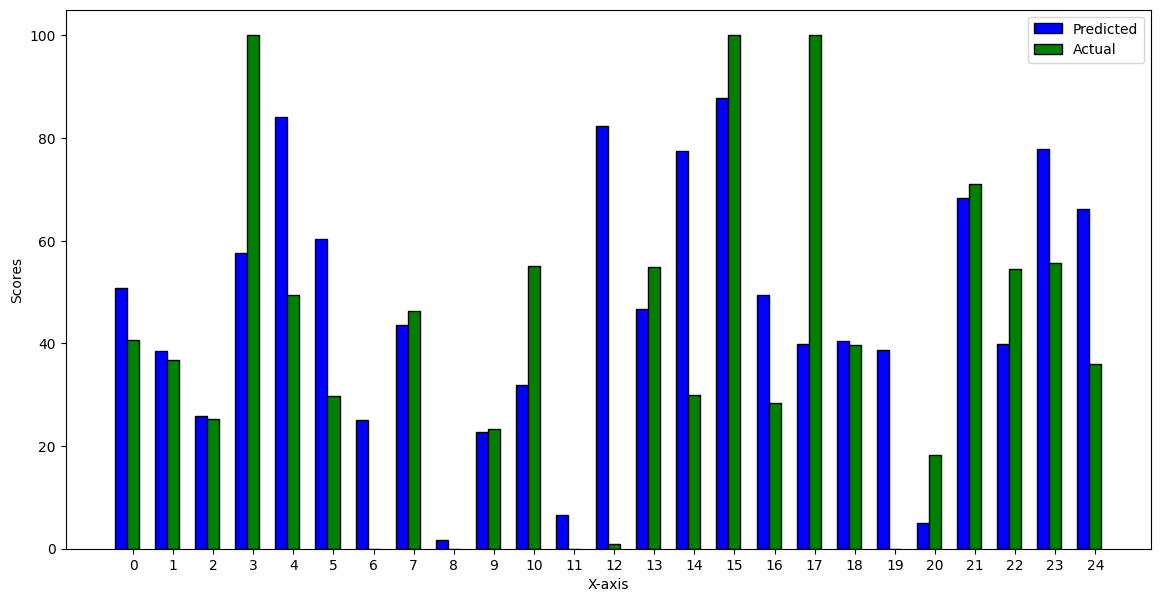

MSE is:  868.9534944423851
Round 3


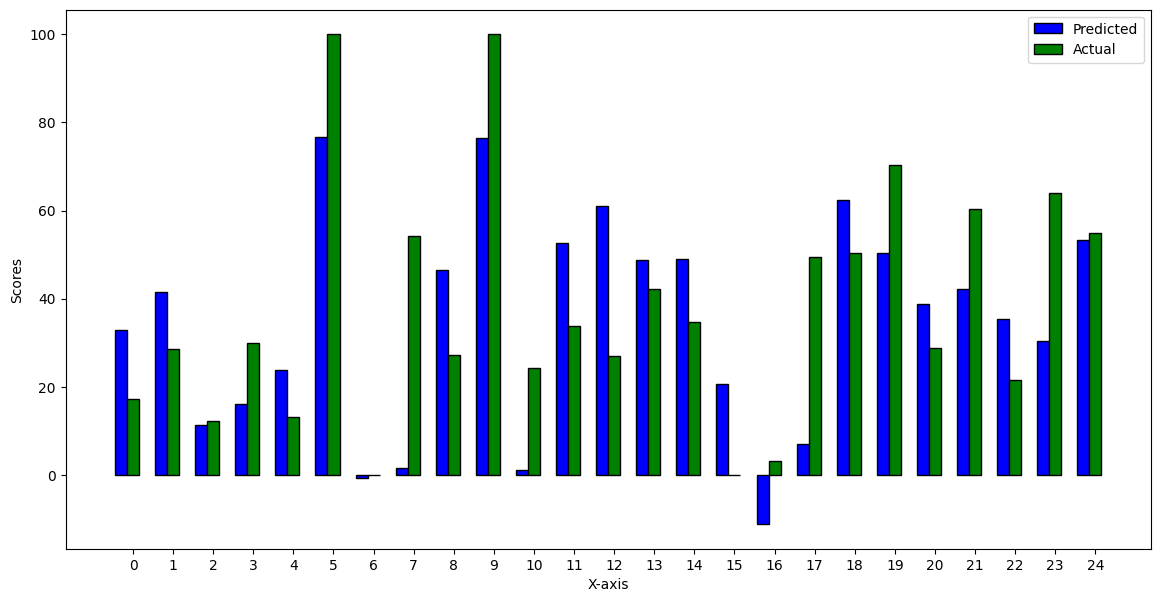

MSE is:  479.63566825326603
Round 4


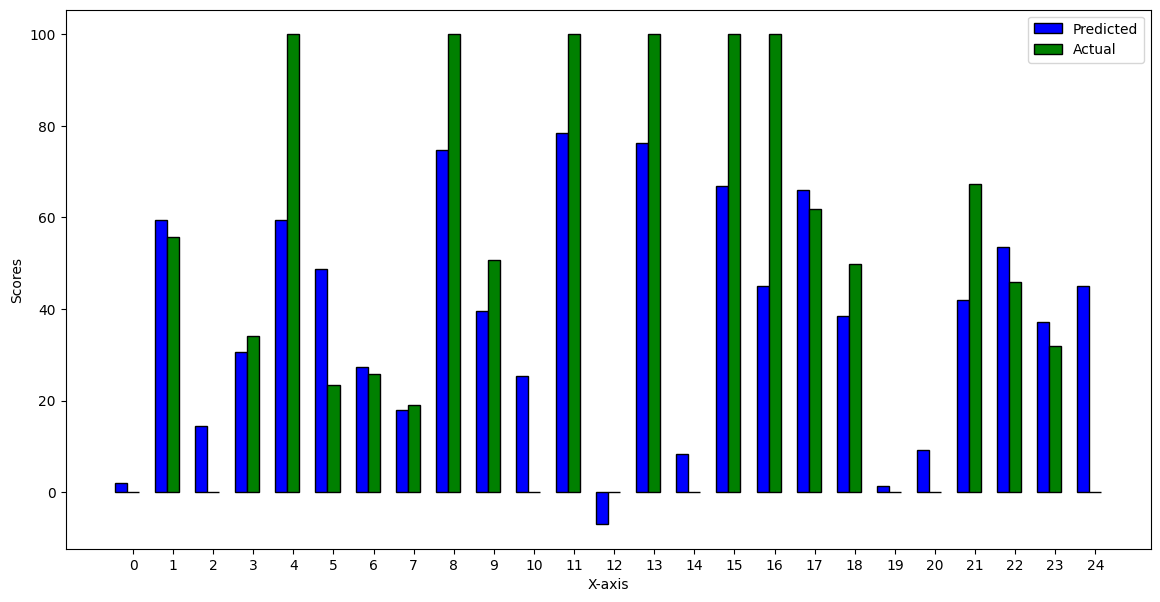

MSE is:  486.92058902709084
Round 5


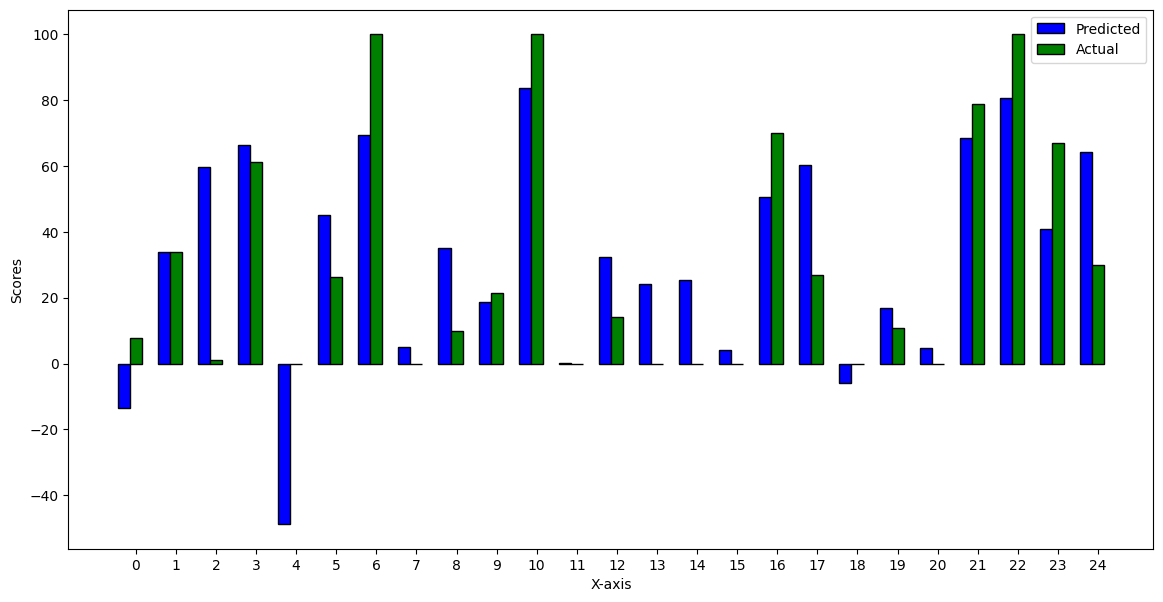

MSE is:  559.8610863210666
Round 6


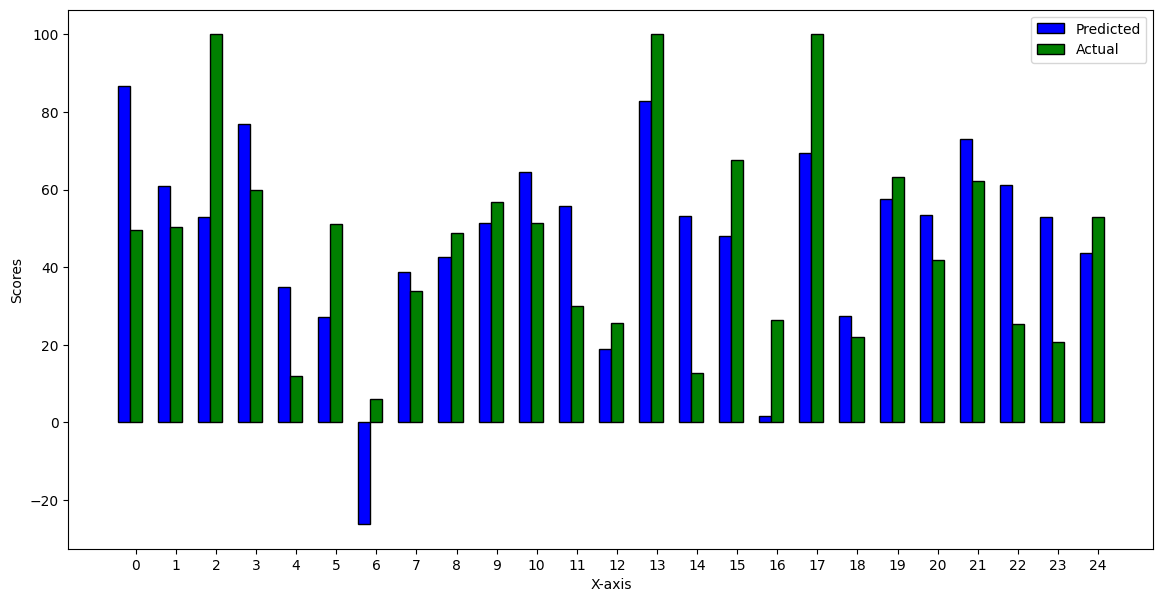

MSE is:  547.4081868400625


In [23]:
for i in range(0, len(list_result)):
  print("Round " + str(i + 1))
  prediction = list_result[i]
  # prediction_reverse = list_reverse_result[i]
  actual = list_groundtruth[i]

  # predicted_average = []
  # for i in range(0, len(actual)):
  #   predicted_average.append((prediction[i] + prediction_reverse[i]) / 2)

  bar_plot_comparison(prediction, actual)

  mse = mean_squared_error(prediction, actual)
  print("MSE is: ", mse)
  # mse_2 = mean_squared_error(prediction_reverse, actual)
  # print("MSE from trained on plagiarism is: ", mse_2)
  # mse_3 = mean_squared_error(predicted_average, actual)
  # print("MSE from combina of two perdiction is: ", mse_3)
